In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
def DataLoader(path):
    '''
    return X, Y
    '''
    print(path)
    data = pd.read_csv(path, encoding='big5')
    data = data.replace('NR', '0')
    data[[str(i) for i in range(24)]] = data[[str(i) for i in range(24)]].astype(np.float)
    df = pd.DataFrame()
    for feature_name, feature_value in data.groupby('測項'):
        df[feature_name] = feature_value[[str(i) for i in range(24)]].values.flatten()
    X = np.concatenate([df.iloc[i: i + 9].values.reshape(1, -1) for i in range(len(df) - 9)], axis=0)
    y = np.array([df['PM2.5'].iloc[i + 9] for i in range(len(df) - 9)])
    return X, y

X, y = DataLoader('data/train.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

data/train.csv


In [3]:
class LinearRegression:
    def __init__(self):
        self.b = None
        self.W = None
        self.eta = 0.001
        self.max_iter = 2e4
        self.X = None
        self.y = None
        self.loss_list = []
        self.eps = 1e-7
    
    @property
    def loss(self):
        y_pred = self.X @ self.W + self.b
        return ((self.y - y_pred) ** 2).mean()
    
    @property
    def R2(self):
        return 1 - self.loss / np.var(self.y)
    
    def gradient_descent(self):
        y_pred = self.X @ self.W + self.b
        gd_b = - 2 * (self.y - y_pred).mean()
        gd_W = - 2 * (self.X * ((self.y - y_pred).reshape(self.X.shape[0], -1))).mean(axis=0)
        self.b = self.b - self.eta * gd_b
        self.W = self.W - self.eta * gd_W
        
    def fit(self, X, y):
        st = time.time()
        self.b = 0.0
        self.W = np.zeros(X.shape[1])
        self.X = X
        self.y = y
        self.loss_list.append(self.loss)
        
        k = 0
        while k < self.max_iter:
            k += 1
            self.gradient_descent()
            loss = self.loss
            self.loss_list.append(loss)
            if abs(self.loss_list[-1] - self.loss_list[-2]) < self.eps:
                print(f'loss diff < {self.eps} after {k} iterations')
                break
            if k % 2000 == 0:
                print(f'{k} iters; loss={loss}; R2={self.R2}')
        ed = time.time()
        
        print(f'{(ed - st) // 60} min')

    def pred(self, X, y):
        self.X = X
        self.y = y
        pred = self.X @ self.W + self.b
        return self.loss, self.R2, pred

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

2000 iters; loss=42.61616044117808; R2=0.8414590524889272
4000 iters; loss=37.336275604073045; R2=0.8611013181496118
6000 iters; loss=35.18803192507369; R2=0.8690932297818981
8000 iters; loss=34.00279824881322; R2=0.8735025446547321
10000 iters; loss=33.25399573146891; R2=0.8762882451817025
12000 iters; loss=32.7405607614284; R2=0.8781983296612251
14000 iters; loss=32.36873729698913; R2=0.8795815899960087
16000 iters; loss=32.08889871555879; R2=0.880622647505433
18000 iters; loss=31.87232327372417; R2=0.8814283530265459
20000 iters; loss=31.701210121132046; R2=0.8820649294112487
1.0 min


In [5]:
test_loss, test_R2, test_pred = model.pred(X_test, y_test)

In [6]:
test_loss, test_R2

(41.1842294331974, 0.860855140106835)

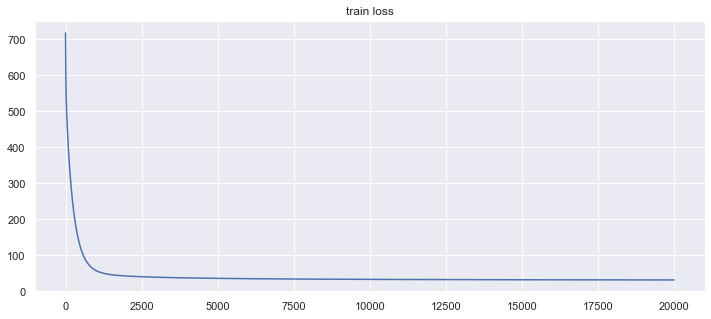

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
plt.figure(figsize=(12,5))
plt.title('train loss')
plt.plot(model.loss_list)
plt.show()

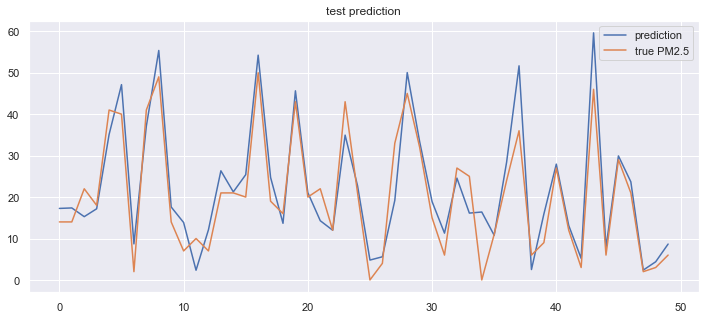

In [8]:
plt.figure(figsize=(12,5))
plt.title('test prediction')
plt.plot(test_pred[: 50], label='prediction')
plt.plot(y_test[: 50], label='true PM2.5')
plt.legend()
plt.show()